In [2]:
%load_ext autoreload
%autoreload 2
import sys
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"
import multiprocessing as mp
import time
import glob
import re
import random
from sklearn.model_selection import train_test_split
import torch

sys.path.insert(0, '/Data/user/panhailin/git_lab/npspy')
import npspy as nps
from npspy import npsc

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
metrics_dfs = []
pred_proba_df = pd.read_csv(f"../../../04.tables/classification_for_real_data/hp12/hp12_pred_proba.csv", index_col=0)
metrics_df = npsc.get_metrics_from_pred_proba_df(pred_proba_df)
metrics_df.index = ['clean']
metrics_dfs.append(metrics_df)

pred_proba_df = pd.read_csv(f"../../../03.results/classification_on_clean_data/hp12/diff_data_size/valid/valid_data_ds_25000_pred_proba.csv", index_col=0)
metrics_df = npsc.get_metrics_from_pred_proba_df(pred_proba_df)
metrics_df.index = ['valid']
metrics_dfs.append(metrics_df)

metrics_df = pd.concat(metrics_dfs)
metrics_df

,accuracy,precision,recall,f1_score,jaccard_score
clean,0.948467,0.948674,0.948467,0.948520,0.902838
valid,0.934222,0.934542,0.934222,0.934331,0.877600


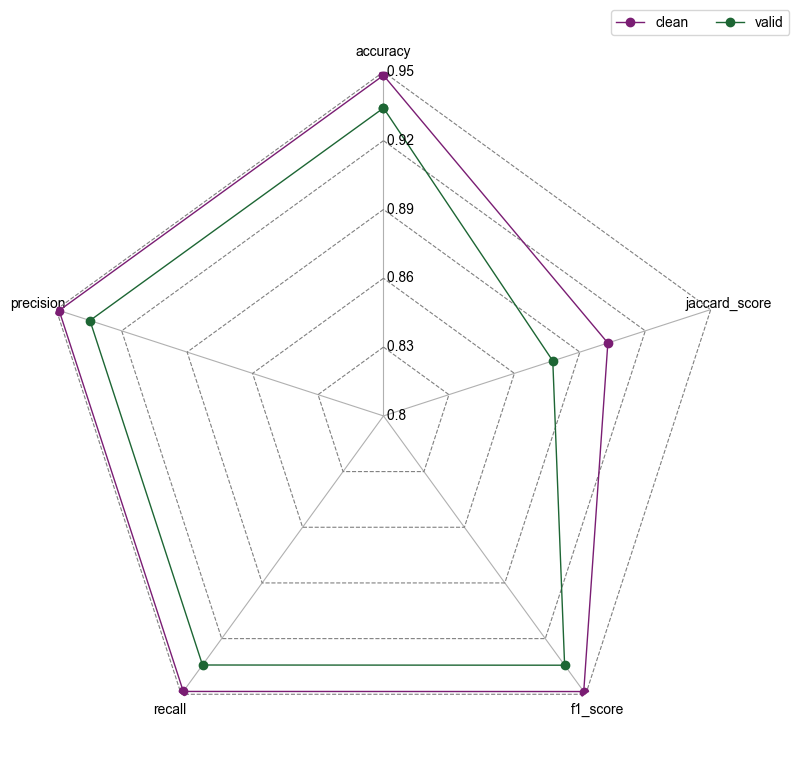

In [4]:
npsc.draw_radar_plot(metrics_df, y_min=0.80, y_max=0.95, 
                     colors=['#7A1D73FF',
                             '#1D6634FF',]
                    )
plt.savefig("../../../05.figures/classification_for_real_data/hp12/rada_plot.pdf", bbox_inches='tight')